In [2]:
''' Import statements'''
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.sparse import csr_matrix
import math

In [3]:
''' Function to read the data and categorize them into X and Y
    returns :
             x - list of feature vectors
             y - list of given predicted values
             xr - nd-array of feature vectors
             yr - nd-array of given predicted values

'''
def read_data(data_file):    
    f = open(data_file,'r')
    x=[] 
    xr=[]
    y=[]
    yr=[]
    for line in f:
        if not line.startswith('#'):
            s=line.split()
            xr.append([float(s[0])])
            x.append(float(s[0]))
            y.append(float(s[1]))
            yr.append([float(s[1])])
    return x,y,xr,yr
    

In [4]:
'''Function to plot the graph
   arg x - Feature vetor
   arg y - given predicted values
   returns - a plot which describes the complexity of the data
'''

def plot_graph(x,y):
    x_axis = np.array(x)
    y_axis = np.array(y)
    plt.title("Single feature plot")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(x_axis, y_axis,'o')
    plt.show()

In [5]:
''' Function to return the desired classifier'''

def get_clf():
    return linear_model.LinearRegression()

In [110]:
x4,y4,xr4,yr4 = read_data('svar-set4.dat') #Read the data

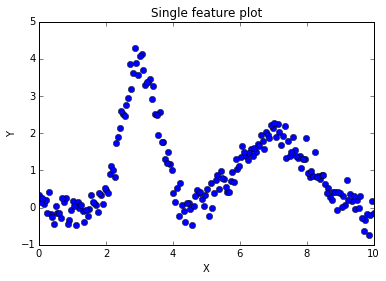

In [111]:
plot_graph(x4,y4) #plot the data

In [112]:
'''Function to return the transformed matrix
   Input 1 : Feature vector 
   Input 2: Desired degree
   Output : 'Z' - the tranformed matrix eg., [1 x x**2 ....]

'''

def Z_Transform(x,degree):
        poly = PolynomialFeatures(degree)
        z=poly.fit_transform(np.array(x))
        return z

In [113]:
'''Function to calculate the theta values
   Input 1: 'Z' - the tranformed matrix eg., [1 x x**2 ....]
   Input 2: Y values
   Output: theta according to the order eg if degree = 2 , 3 theta values will be returned
'''

def poly_theta(z,y):
    theta = np.dot(np.linalg.pinv(z),y)
    return theta
    

In [114]:
'''Function to calculate the mse 
   Input 1: Predicted values
   Input 2: True values
   Output: mse of predicted and truth 
'''


def mse_calculator(pred,y):
    return sum([(i-j)**2 for i,j in zip(pred,y)])/len(y) # formula to calulate mse - 1/m*sum(yhat-y)**2
    

In [115]:
'''Function to calculate the rse 
   Input 1: Predicted values
   Input 2: True values
   Output: rse of predicted and truth 
'''

def rse_calculator(pred,y):
    return sum([(i-j)**2/y**2 for i,j in zip(pred,y)])/len(y) # formula to calulate mse - 1/m*sum(yhat-y)**2/y**2
    

In [116]:
'''Function to predict the output of the given z
   Input 1: Thetas
   Input 2: Input 1: 'Z' - the tranformed matrix eg., [1 x x**2 ....]
   Output: Predictions of the given Z matrix
 
'''

def predict(theta,z):
    predictions = []
    for i in z:
        predictions.append(np.dot(theta.transpose(),np.array(i)))
    #print theta.transpose()
    return predictions

In [117]:
'''Function to perform 10-fold cross validation. In this method the test and train indices are split programatically without the 
   use of in-built function  
    Input 1: 'Z' - the tranformed matrix eg., [1 x x**2 ....]
    Input 2: True predicted values
    Input 3: No of folds (10 by default)
    
    Performance measures such as mean suared error and relative suared error are calculated in this function

'''

def split_indices_cross_fold(x,y,nfolds=10):
    
    split = int((len(y))/nfolds) #split size of the data
    idx=[i for i in range(len(y))] # indices list [0 .... size(data)-1]
    i=0
    j=1
    MSE_tr=[]
    MSE_ts=[]
    RSE_tr=[]
    RSE_ts=[]
    while j <  nfolds+1: # repeat n-fold times
        test_idx=idx[split*i:split*j] # Get test indices
        train_idx=list(set(idx)-set(test_idx)) # Get test indices
        y_=np.array(y)
        theta = poly_theta(x[train_idx],y_[train_idx])
        pred_train=predict(theta,x[train_idx])
        error_tr = mse_calculator(pred_train,y_[train_idx])
        MSE_tr.append(error_tr)
        pred_test = predict(theta,x[test_idx])
        error_ts = mse_calculator(pred_test,y_[test_idx])
        MSE_ts.append(error_ts)
        error_rse_tr = rse_calculator(pred_train,y_[train_idx]) #calculate rse for train 
        RSE_tr.append(error_rse_tr)
        error_rse_ts = rse_calculator(pred_test,y_[test_idx]) #calculate rse for test
        RSE_tr.append(error_rse_ts)
        i+=1
        j+=1
    print 'MSE of train: %f' %np.mean(MSE_tr)
    print 'MSE of test: %f' %np.mean(MSE_ts)
    
    
     

In [118]:
Z=Z_Transform(xr4,3)
split_indices_cross_fold(Z,yr4)

MSE of train: 0.918144
MSE of test: 0.938203


In [119]:
'''Function to perform 10-fold cross validation. In this method the test and train indices are split using using the inbuit
   'KFold' function.
    Input 1: 'Z' - the tranformed matrix eg., [1 x x**2 ....]
    Input 2: True predicted values
    Input 3: No of folds (10 by default)
    
    Performance measures such as mean suared error and relative suared error are calculated in this function

'''


def poly_ten_fold(x,y,nfolds=10):
    cv = KFold(len(y), nfolds) #inbuilt function to split the indices
    MSE_tr=[]
    MSE_ts=[]
    RSE_tr=[]
    RSE_ts=[]
    for train_idx, test_idx in cv:
        y_=np.array(y)
        theta = poly_theta(x[train_idx],y_[train_idx]) # Find theta for the train set
        pred_train=predict(theta,x[train_idx]) # Predict values using the formula theta.transpose * z for train set
        error_tr = mse_calculator(pred_train,y_[train_idx]) #calculate mse for train
        MSE_tr.append(error_tr)
        error_rse_tr = rse_calculator(pred_train,y_[train_idx]) #calculate rse for train 
        RSE_tr.append(error_rse_tr)
        pred_test = predict(theta,x[test_idx])  # Predict values using the formula theta.transpose * z for test set
        error_ts = mse_calculator(pred_test,y_[test_idx]) #calculate mse for test 
        error_rse_ts = rse_calculator(pred_test,y_[test_idx]) #calculate rse for test 
        MSE_ts.append(error_ts)
        RSE_ts.append(error_rse_ts)
    print 'MSE of train: %f' %np.mean(MSE_tr)
    print 'MSE of test: %f' %np.mean(MSE_ts)

In [120]:
Z=Z_Transform(xr4,2)
poly_ten_fold(Z,yr4)

MSE of train: 0.927843
MSE of test: 0.940830


In [121]:
'''Function to perform 10-fold cross validation using ready made python functions. This function is used to compare the results
   of the earlier obtained model
    Input 1: 'Z' - the tranformed matrix eg., [1 x x**2 ....]
    Input 2: True predicted values
    Input 3: No of folds (10 by default)
    
    Performance measures such as mean suared error is calculated in this function

'''



def poly_ten_fold_validation_verify(x,y,nfolds=10):
    cv = KFold(len(y), nfolds)
    MSE_tr=[]
    MSE_ts=[]
    RSE_tr=[]
    RSE_ts=[]
    error_tr = 0
    error_ts = 0
    for train_idx, test_idx in cv:
        t = csr_matrix(x).toarray() # convert the train data into CSR matrix
        y_=np.array(y)
        clf = get_clf() # get the classifier
        clf.fit(t[train_idx], y_[train_idx]) # fit the data
        pred_test = clf.predict(t[test_idx]) 
        pred_train = clf.predict(t[train_idx])
        error_ts += mean_squared_error(y_[test_idx], pred_test)
        error_tr += mean_squared_error(y_[train_idx],pred_train)
    print error_tr/nfolds
    print error_ts/nfolds


    

In [122]:
Z=Z_Transform(xr4,3)
poly_ten_fold_validation_verify(Z,yr4)

0.918143935202
0.938203377002


In [132]:
'''Function to plot the model on top of the test data by splitting the train data and test data into various splits
    Input 1: 'Z' - the tranformed matrix eg., [1 x x**2 ....]
    Input 2: True predicted values
    Input 3: No of folds (10 by default)
    
    Performance measures such as mean suared error and relative suared error are calculated in this function

'''


def poly_fit_test(x,xp,y):
    train_index = int(0.7*len(y))
    x_train = x[:train_index]
    y_train = y[:train_index]
    x_test = x[train_index:]
    y_test = y[train_index:]
    xptest=xp[train_index:]
    y_=np.array(y)
    theta = poly_theta(x_train,y_train)
    pred_train=predict(theta,x_train)
    pred_test = predict(theta,x_test)
    error_tr = mse_calculator(pred_train,y_train)
    error_ts = mse_calculator(pred_test,y_test)
    print error_tr
    print error_ts
    plt.scatter(xptest,y_test,color='black')
    plt.scatter(np.array(xptest),predict(theta,x_test),color='red',linewidth=3)
    

[ 0.7899927]
[ 0.85956034]


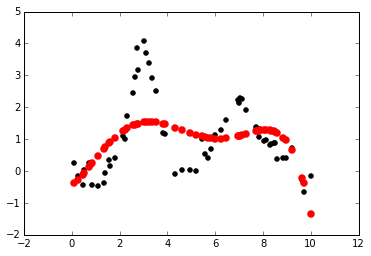

In [135]:

Z=Z_Transform(xr4,5)
poly_fit_test(Z,x4,yr4)